<a href="https://colab.research.google.com/github/RenatoCoronado99/Machine-Learning/blob/main/Trabajo_Final_AdaBoost_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ColumnNames = ["sequence","mcg","gvh","alm","mit","erl","pox","vac","nuc","Class"]
path = "/content/drive/MyDrive/ML/Trabajo Final/yeast.xlsx"
data= pd.read_excel(path,names =ColumnNames)
data

,sequence,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
...,...,...,...,...,...,...,...,...,...,...
1473,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1474,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1475,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1476,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [ ]:
#alm mcg mit
#y = data["Class"]
#colNames =["mcg","alm","mit","gvh"]
#data2 = data[colNames]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Class"] = le.fit_transform(data["Class"])
data["sequence"] = le.fit_transform(data["sequence"])
data2=data
y = data2["Class"]
X = data2.drop(["Class"],axis="columns")


In [ ]:
##Colorcarlos en un rango de 0 y 1 
#data2= normalize(data,colNames)

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
print(f"X_train {X_train.shape}")
print(f"X_train {y_train.shape}")
print(f"X_train {X_test.shape}")
print(f"X_train {y_test.shape}")

X_train (1034, 9)
X_train (1034,)
X_train (444, 9)
X_train (444,)


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200)]
algorithm=["SAMME","SAMME.R"]
param_grid = {
    "n_estimators": n_estimators,
    "algorithm": algorithm,
}

In [ ]:
print(n_estimators)

[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 70, 74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114, 118, 122, 126, 130, 135, 139, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200]


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_ada_boost = AdaBoostClassifier()
rf_ada_boost= GridSearchCV(estimator = rf_ada_boost,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
rf_ada_boost.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37,
                                          41, 45, 49, 53, 57, 61, 65, 70, 74,
                                          78, 82, 86, 90, 94, 98, 102, 106, 110,
                                          114, 118, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print(param_grid)

{'n_estimators': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 70, 74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114, 118, 122, 126, 130, 135, 139, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200], 'algorithm': ['SAMME', 'SAMME.R']}


In [ ]:
print(f'Train Accuracy : {rf_ada_boost.score(X_train,y_train):.3f}')
print(f'Test Accuracy : {rf_ada_boost.score(X_test,y_test):.3f}')
print(f'Best Params : {rf_ada_boost.best_params_}')
print(f'Estimator : {rf_ada_boost.best_estimator_} y indice {rf_ada_boost.best_index_}')

Train Accuracy : 0.556
Test Accuracy : 0.486
Best Params : {'algorithm': 'SAMME', 'n_estimators': 41}
Estimator : AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=41, random_state=None) y indice 10


Codigo del profe

In [ ]:
train,validate,test=np.split(data2.sample(frac=1),[int(.8*len(data2)),int(.90*len(data2))])
yTrain = train["Class"]
XTrain = train.drop("Class",axis="columns")
XVal = validate.drop("Class",axis ="columns")
yVal = validate["Class"]

accTrain =[]
accVal =[]
numEst = []


In [ ]:
for i in range(1,200):
  model = AdaBoostClassifier(n_estimators=i,algorithm="SAMME")
  model.fit(XTrain,yTrain)
  pred = model.predict(XTrain)
  acc  = accuracy_score(yTrain,pred)
  accTrain.append(acc)
  test=model.predict(XVal)
  acc = accuracy_score(yVal,test)
  accVal.append(acc)
  numEst.append(i)

In [ ]:
index_max = max(range(len(accTrain)),key=accTrain.__getitem__)
print(index_max)
##Se puede utiliar gridserach

index_max = max(range(len(accVal)),key=accVal.__getitem__)
print(index_max)

40
35


In [ ]:
print(max(accTrain))
print(pd.Series(accVal))
print(numEst)

0.5634517766497462
0      0.378378
1      0.385135
2      0.385135
3      0.391892
4      0.385135
         ...   
194    0.486486
195    0.479730
196    0.493243
197    0.493243
198    0.472973
Length: 199, dtype: float64
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,

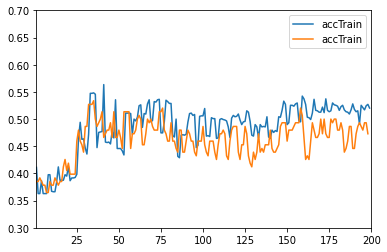

In [ ]:
plt.figure(1)
axes=plt.gca()
axes.set_xlim([1,200])
axes.set_ylim([0.3,0.7])
d=pd.DataFrame({
  "accTrain":pd.Series(accTrain),
  "accVal":pd.Series(accVal),
  "numEst":pd.Series(numEst)
})
plt.plot("numEst","accTrain","accVal",data=d)
plt.legend()
##Azul conjutno de datos de entrenamiento

##Linea naranja conjutno de datos de

In [ ]:
model = AdaBoostClassifier(n_estimators=35,algorithm="SAMME")

print(cross_val_score(model,XTrain,yTrain,cv=10).mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.4982623557897735
